<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Supervised_Learning_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def random_forest_explore(train_data, test_data, c1, c2):
    """
    Explore Random Forest classifiers for two classes from a 26-class dataset.
    Plots train vs test accuracy vs max_depth and n_estimators.
    Returns a DataFrame with results.
    """
    # --- Filter only the two classes ---
    train_subset = train_data[train_data.iloc[:, -1].isin([c1, c2])].copy()
    test_subset = test_data[test_data.iloc[:, -1].isin([c1, c2])].copy()

    X_train = train_subset.iloc[:, :-1].values
    y_train = train_subset.iloc[:, -1].values
    X_test = test_subset.iloc[:, :-1].values
    y_test = test_subset.iloc[:, -1].values

    n_estimators_list = list(range(5, 101, 5))
    max_depth_list = list(range(3, 11))

    # --- Store results ---
    results = []

    # Explore accuracy vs max_depth for different n_estimators
    plt.figure(figsize=(12, 5))
    for n_trees in [5, 25, 50, 75, 100]:
        train_acc = []
        test_acc = []
        for depth in max_depth_list:
            clf = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, random_state=42)
            clf.fit(X_train, y_train)
            current_train_acc = accuracy_score(y_train, clf.predict(X_train))
            current_test_acc = accuracy_score(y_test, clf.predict(X_test))
            train_acc.append(current_train_acc)
            test_acc.append(current_test_acc)
            results.append(["RandomForest", n_trees, depth, current_train_acc, current_test_acc])
        plt.plot(max_depth_list, train_acc, 'o-', label=f'Train n={n_trees}')
        plt.plot(max_depth_list, test_acc, 's--', label=f'Test n={n_trees}')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title(f'Random Forest: Accuracy vs Max Depth ({c1} vs {c2})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Explore accuracy vs n_estimators for different max_depth
    plt.figure(figsize=(12, 5))
    for depth in [3, 5, 7, 10]:
        train_acc = []
        test_acc = []
        for n_trees in n_estimators_list:
            # Avoid re-adding results for configurations already tested in the first loop
            if depth in max_depth_list and n_trees in [5, 25, 50, 75, 100]:
                 continue

            clf = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, random_state=42)
            clf.fit(X_train, y_train)
            current_train_acc = accuracy_score(y_train, clf.predict(X_train))
            current_test_acc = accuracy_score(y_test, clf.predict(X_test))
            train_acc.append(current_train_acc)
            test_acc.append(current_test_acc)
            results.append(["RandomForest", n_trees, depth, current_train_acc, current_test_acc])

        # Filter results list to get data for plotting this depth
        plot_data_this_depth = [r for r in results if r[2] == depth]
        plot_n_trees = [r[1] for r in plot_data_this_depth]
        plot_train_acc = [r[3] for r in plot_data_this_depth]
        plot_test_acc = [r[4] for r in plot_data_this_depth]


        plt.plot(plot_n_trees, plot_train_acc, 'o-', label=f'Train depth={depth}')
        plt.plot(plot_n_trees, plot_test_acc, 's--', label=f'Test depth={depth}')

    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.title(f'Random Forest: Accuracy vs Number of Trees ({c1} vs {c2})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create DataFrame from results
    results_df = pd.DataFrame(results, columns=['Classifier', 'n_estimators', 'max_depth', 'Train_Acc', 'Test_Acc'])
    return results_df

Code for downloading csv file

In [ ]:
from google.colab import files

# Download the Random Forest results CSV file
try:
  files.download('random_forest_results_A_B.csv')
except FileNotFoundError:
  print("random_forest_results_A_B.csv not found. Please run the previous cell to generate it.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

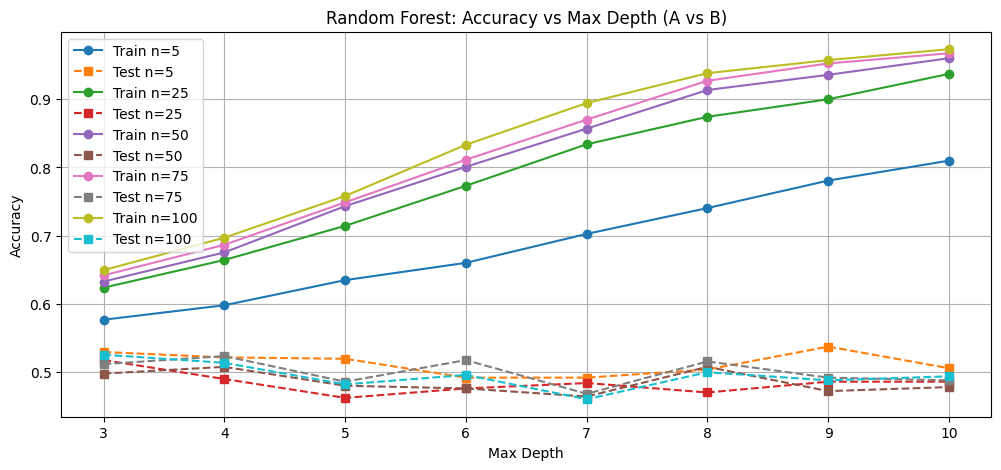

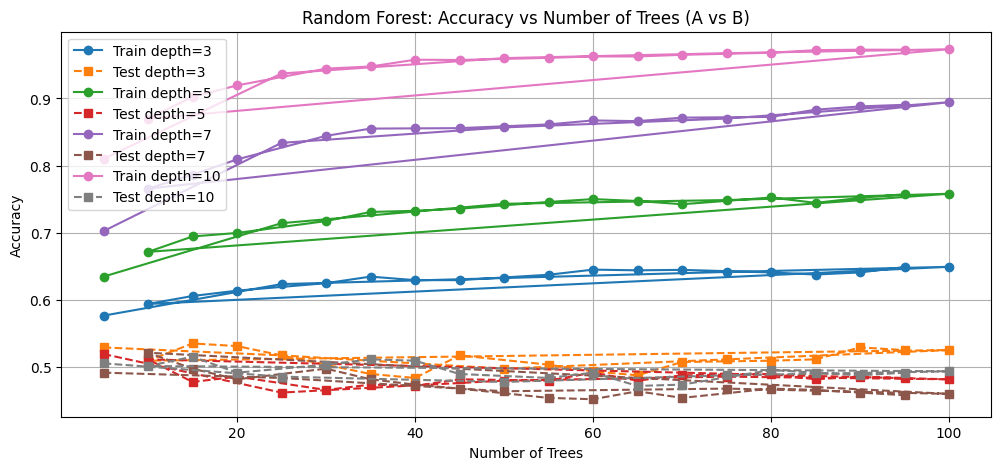


📊 Random Forest Results Table (A vs B):


,Classifier,n_estimators,max_depth,Train_Acc,Test_Acc
0,RandomForest,5,3,0.576936,0.529644
1,RandomForest,5,4,0.598124,0.521739
2,RandomForest,5,5,0.634943,0.519763
3,RandomForest,5,6,0.660299,0.492095
4,RandomForest,5,7,0.702675,0.492095
...,...,...,...,...,...
95,RandomForest,70,10,0.964918,0.474308
96,RandomForest,80,10,0.968044,0.496047
97,RandomForest,85,10,0.971865,0.492095
98,RandomForest,90,10,0.972560,0.488142



Random Forest results table saved to random_forest_results_A_B.csv


In [ ]:
# Assuming train_df_svm and test_df_svm are already defined from previous cells
# These DataFrames contain the preprocessed data with original string labels

# Run Random Forest exploration for classes 'A' and 'B'
# You can change 'A' and 'B' to any two class labels from your dataset
rf_results_A_B = random_forest_explore(train_df_svm, test_df_svm, c1='A', c2='B')

# Display the results table
print("\n📊 Random Forest Results Table (A vs B):")
display(rf_results_A_B)

# Save the results to a CSV file
rf_results_A_B.to_csv("random_forest_results_A_B.csv", index=False)
print("\nRandom Forest results table saved to random_forest_results_A_B.csv")

Recommendations:


1.   Increasing the depth the test accuracy is increasing and this may lead to overfitting(train>test)
2.   As the number of trees are increasing the test and train accuracy is stabilizing
3.   After 40 tress the train and test is getting stabilized and the depth after 8 will be the best optimization

